<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Youtube_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('top-1000-trending-youtube-videos.csv')
df.head(11)

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021
5,6,JP Saxe - If the World Was Ending (Official Vi...,"76,834,495","804,353","21,195",Music,2019
6,7,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
7,8,Power Star Pawan Kalyan Special Surprise To Se...,"96,686","1,007",82,Entertainment,2018
8,9,Kulit Kamu Kulit Kering dan Sensitif? Pakai Av...,"9,605,969",6,NaN,NaN,2023
9,10,Totti with a funny penalty,"8,353,318","5,613","1,082",Sports,2007


In [6]:
df.tail(11)

,rank,Video,Video views,Likes,Dislikes,Category,published
989,990,Champions and Challengers - Adventure Time - P...,"2,986,914",795,174,Gaming,2017
990,991,ITS Coop Travel - Traumhafte Ferien (kurz),"1,263,044",2,5,Travel & Events,2017
991,992,It Got Grandma!: Chimp at Zoo Throws Poo in Gr...,"3,975,037","24,800","1,387",Pets & Animals,2017
992,993,2017 0401 s10 Toruń Bydgoszcz,"1,273,971","3,076",454,Entertainment,2017
993,994,Eagles Fan Gets Wrecked by Pole,"706,418",877,40,Film & Animation,2018
994,995,UltraTap - новости из соцсетей,"498,038",706,"1,533",People & Blogs,2017
995,996,CALIFORNIA - MONDAY JUSTICE FEAT. SNOOP DOGG (...,"943,248","2,949",22,Music,2017
996,997,John McEnroe's most famous outburst happened i...,"4,853,621","7,254",426,Sports,2010
997,998,Adi Golan's Group - Teaser,"56,578",NaN,NaN,Music,2014
998,999,Keg tapping goes horribly wrong.,"751,804","3,427",313,Entertainment,2017


In [7]:
df.shape

(1000, 7)

In [11]:
df.columns

Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')

In [12]:
df.dtypes

,0
rank,int64
Video,object
Video views,object
Likes,object
Dislikes,object
Category,object
published,int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [14]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2015.933000
std,288.819436,6.054847
min,1.000000,2005.000000
25%,250.750000,2010.000000
50%,500.500000,2017.000000
75%,750.250000,2021.000000
max,1000.000000,2025.000000


In [18]:
df.isnull().sum()

,0
rank,0
Video,0
Video views,0
Likes,27
Dislikes,313
Category,180
published,0


In [28]:
df['Likes'] = df['Likes'].fillna(df['Likes'].mode()[0])

# We have to change the dislike str to int to fill in the missing values:
df['Dislikes'] = pd.to_numeric(df['Dislikes'], errors='coerce')
df['Dislikes'] = df['Dislikes'].fillna(df['Dislikes'].mean())

df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

In [29]:
df.isnull().sum()

,0
rank,0
Video,0
Video views,0
Likes,0
Dislikes,0
Category,0
published,0


In [30]:
df.duplicated().sum()

np.int64(0)

# Visualization

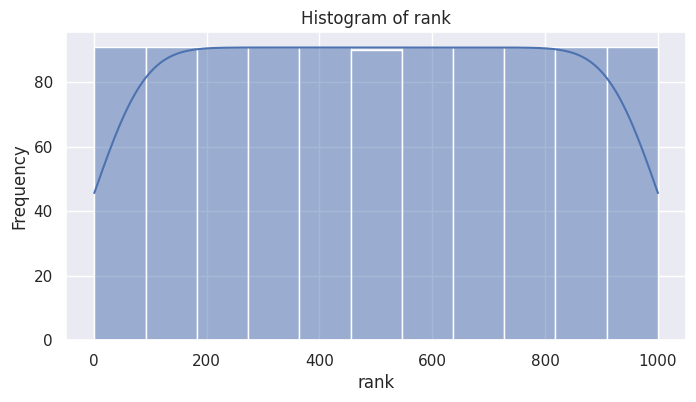

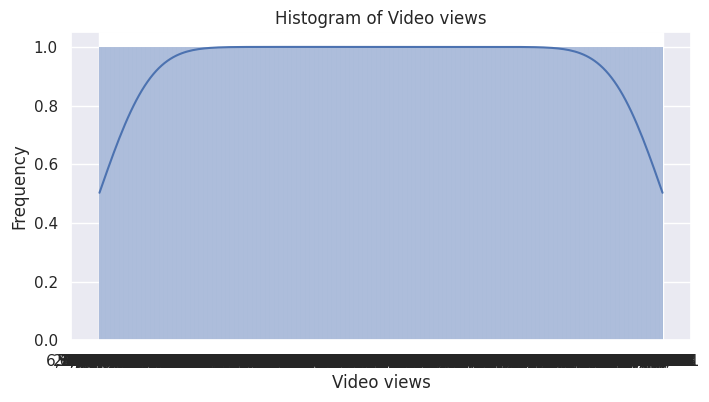

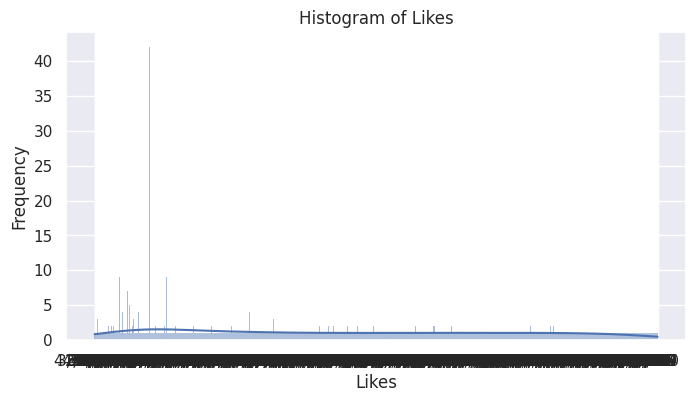

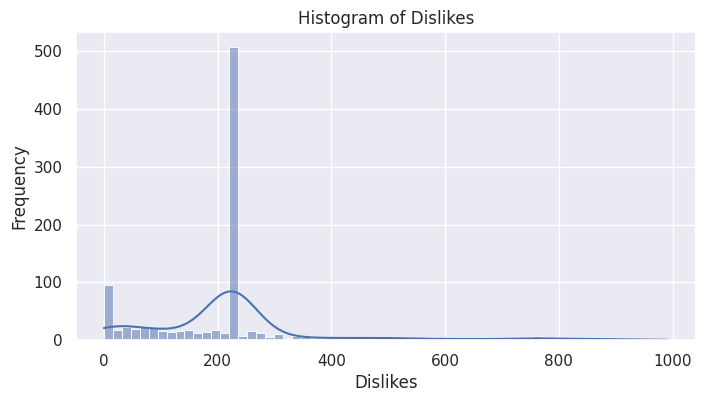

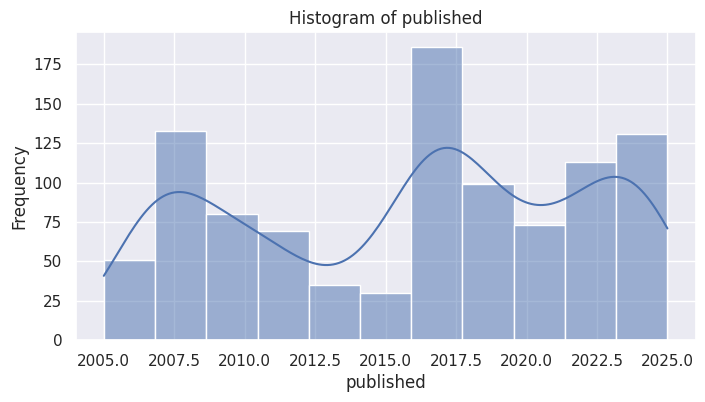

In [31]:
# Histogram for numeric columns
numeric_cols = ['rank', 'Video views', 'Likes', 'Dislikes', 'published']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

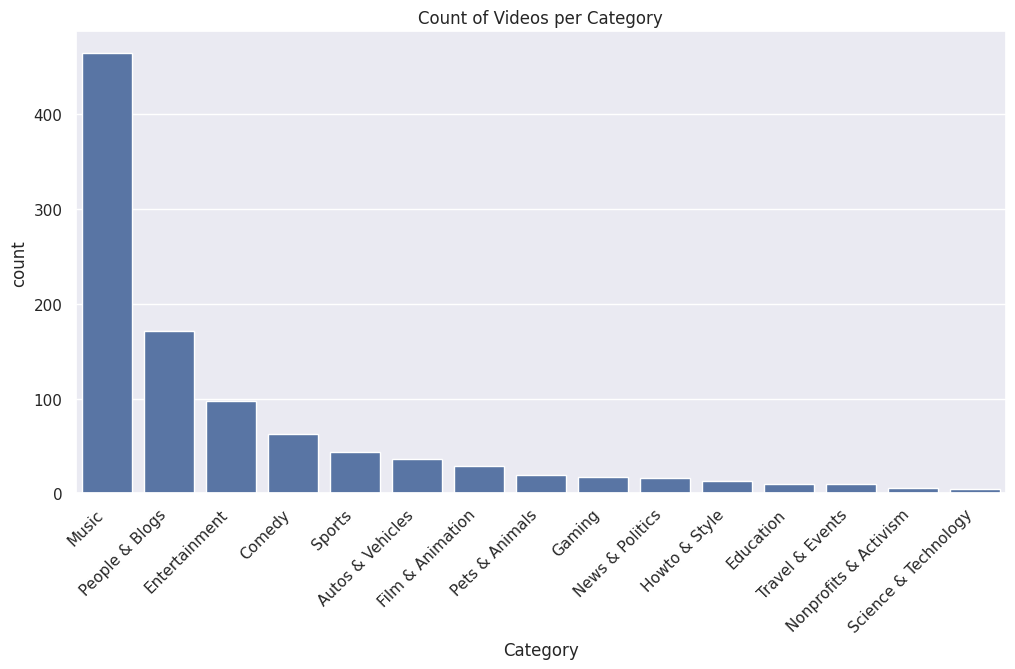

In [32]:
# Count plot for the categorical column 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Videos per Category')
plt.show()

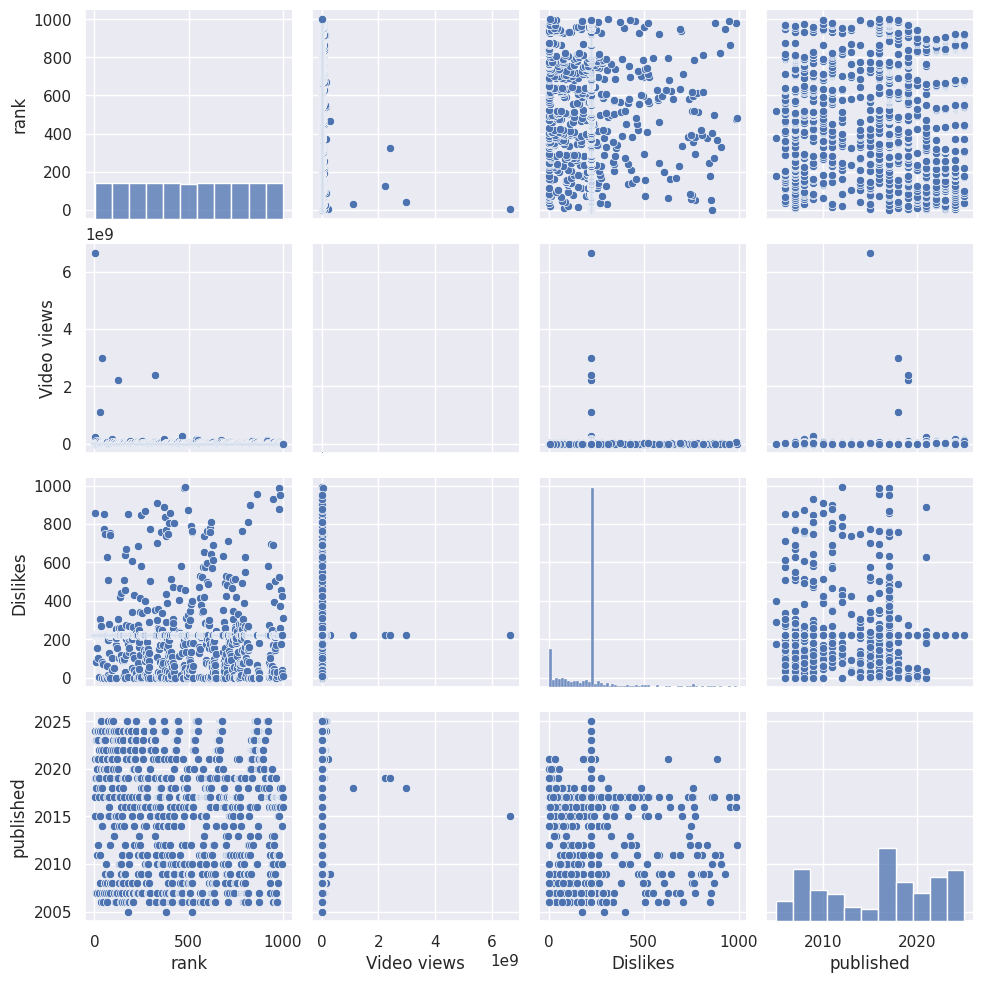

In [36]:
# Pair plot to observe relationships between numeric variables
sns.pairplot(df[numeric_cols].dropna())
plt.show()

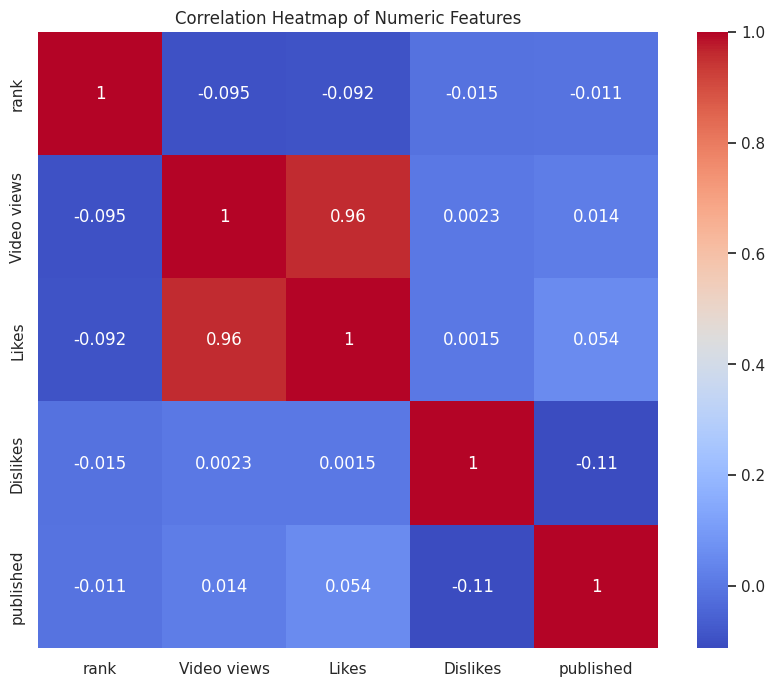

In [40]:
# Correlation Heatmap
numeric_df = df[numeric_cols]
# Convert columns with potential commas to numeric
for col in ['Video views', 'Likes', 'Dislikes']:
    # Check if the column is of type object (likely string) before applying str.replace
    if numeric_df[col].dtype == object:
        numeric_df[col] = pd.to_numeric(numeric_df[col].str.replace(',', ''), errors='coerce')
    else:
        # If not an object, assume it's already numeric or handle accordingly
        pass  # Or apply any other necessary conversion for non-string types
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to display a correlation heatmap.')

In [41]:
# Thank you